# Eager Execution

Adapted from: https://www.tensorflow.org/get_started/eager

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_dataset_fp = '../data/iris_training.csv'

In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


## Csv parser

In [14]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]
    # parse a line and if it fails -> return defaults
    parsed_line = tf.decode_csv(line, example_defaults)
    # remove last element (it is the label)
    features = tf.reshape(parsed_line[:-1], shape=(4,))
    # get last element (it is the the label)
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label

## Dataset API

In [15]:
# ALL OF THE FOLLOWING ARE JUST DEFINITIONS (NOT EVALUATED)

# the data are text lines
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
# operations on the dataset
train_dataset = train_dataset.skip(1)
train_dataset = train_dataset.map(parse_csv)
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(32)

In [7]:
train_dataset

<BatchDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [8]:
features, label = tfe.Iterator(train_dataset).next()

In [9]:
features

<tf.Tensor: id=42, shape=(32, 4), dtype=float32, numpy=
array([[5.8, 2.6, 4. , 1.2],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 3.4, 5.6, 2.4],
       [4.8, 3. , 1.4, 0.3],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3.5, 1.6, 0.6],
       [6.4, 2.8, 5.6, 2.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.2, 1.4, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.4, 3. , 1.3, 0.2],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [6.9, 3.2, 5.7, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [4.9, 3. , 1.4, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [7.2, 3.6, 6.1, 2.5],
       [5.5, 2.4, 3.7, 1. ],
       [5.5, 2.6, 4.4, 1.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.7, 3. , 5.2, 2.3],
       [5.7, 4.4, 1.5, 0.4],
       [4.6, 3.1, 1.5, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5. , 2. , 3.5, 1. ],
       [7.7, 2.6, 6.9, 2.3]], dtype=float32)>

In [11]:
label

<tf.Tensor: id=43, shape=(32,), dtype=int32, numpy=
array([1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 0, 0, 2, 1, 2], dtype=int32)>

## Model

Note that the model is outputting the logits, not the softmax probabilities.

In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

# There isn't softmax in the last layer -> it is in the Loss definition
# The model is already compiled

In [13]:
model

model behaves like a function:

In [16]:
model(features)

<tf.Tensor: id=158, shape=(32, 3), dtype=float32, numpy=
array([[ 2.32125610e-01,  4.15565252e-01,  7.55334675e-01],
       [ 1.45915255e-01,  3.39732111e-01,  5.77676654e-01],
       [ 4.70583498e-01,  5.45595527e-01,  1.05730402e+00],
       [ 1.78894207e-01,  6.18245527e-02,  1.54385895e-01],
       [ 2.47207582e-01,  5.91164768e-01,  9.84098554e-01],
       [ 2.03181386e-01,  4.92161624e-02,  2.30367348e-01],
       [ 3.86199743e-01,  5.55680990e-01,  1.07900405e+00],
       [ 2.50824094e-01,  6.11542910e-03,  1.55002087e-01],
       [ 2.30737522e-01,  3.30115072e-02,  1.51247948e-01],
       [ 2.96985686e-01,  5.04418075e-01,  9.31444705e-01],
       [ 2.36132309e-01, -1.61596283e-03,  1.55916944e-01],
       [ 2.19439521e-01,  3.09699446e-01,  6.18160963e-01],
       [ 2.10128158e-01,  9.60976537e-03,  1.42256200e-01],
       [ 2.99015820e-01,  5.25676131e-01,  9.70051944e-01],
       [ 4.23117787e-01,  4.56632018e-01,  9.68457580e-01],
       [ 3.65196496e-01,  5.41427612e-01,  

In eager mode we can access the values of the weights directly:

In [17]:
for i, v in enumerate(model.variables):
    print("Weight shape: ", v.shape)
    print("Weight tensor: ", v)
    print()


Weight shape:  (4, 10)
Weight tensor:  <tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
array([[-0.5597261 , -0.5302708 , -0.22555679, -0.40110505, -0.19787979,
        -0.53712857,  0.23885041, -0.06763422, -0.6162738 , -0.25772834],
       [-0.0731492 ,  0.28287697,  0.3720039 ,  0.45500517,  0.15231442,
         0.594972  , -0.24334699, -0.48526347, -0.06345344, -0.6415445 ],
       [-0.12116504, -0.59067273,  0.3753146 , -0.18778676,  0.37644613,
        -0.40600336,  0.3649099 , -0.3854758 , -0.28795213,  0.18952507],
       [-0.41607934,  0.2525233 , -0.5210645 ,  0.5286106 ,  0.39524257,
         0.32416868, -0.26740727, -0.11725503, -0.5207108 , -0.34261876]],
      dtype=float32)>

Weight shape:  (10,)
Weight tensor:  <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Weight shape:  (10, 10)
Weight tensor:  <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.

## Loss

Loss is sparse categorical cross entropy

In [18]:
def loss(model, x, y):
    y_ = model(x)
    # define here loss and activation ot the last layer
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [19]:
loss(model, features, label)

<tf.Tensor: id=223, shape=(), dtype=float32, numpy=0.9360188>

## Gradients

In eager mode we can evaluate the gradients

In [20]:
def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [21]:
grads = grad(model, features, label)

In [22]:
for i, g in enumerate(grads):
    print("Gradient shape: ", g.shape)
    print("Gradient tensor: ", g)
    print()


Gradient shape:  (4, 10)
Gradient tensor:  tf.Tensor(
[[ 0.          0.         -0.08657197  0.          0.2347456   0.
  -0.35403103  0.          0.          0.        ]
 [ 0.          0.         -0.14714403  0.          0.1534805   0.
  -0.14631647  0.          0.          0.        ]
 [ 0.          0.          0.15039381  0.          0.07682529  0.
  -0.3388629   0.          0.          0.        ]
 [ 0.          0.          0.0624716   0.          0.01556699  0.
  -0.13198575  0.          0.          0.        ]], shape=(4, 10), dtype=float32)

Gradient shape:  (10,)
Gradient tensor:  tf.Tensor(
[ 0.          0.         -0.02601108  0.          0.04867848  0.
 -0.0539533   0.          0.          0.        ], shape=(10,), dtype=float32)

Gradient shape:  (10, 10)
Gradient tensor:  tf.Tensor(
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.     

## Optimizer

Let's use simple gradient descent

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## Training Loop

This is what the Keras split function do for us

In [27]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

# Loop over epochs
for epoch in range(num_epochs):
    
    # accumulators for mean loss and accuracy
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

    # loop on dataset, for each batch:
    for x, y in tfe.Iterator(train_dataset):
        # Calculate gradients
        grads = grad(model, x, y)
        
        # Apply gradients to the weights
        optimizer.apply_gradients(zip(grads, model.variables),
                                  global_step=tf.train.get_or_create_global_step())

        # accumulate loss
        epoch_loss_avg(loss(model, x, y))
        
        # calculate predictions
        y_pred = tf.argmax(model(x), axis=1, output_type=tf.int32)
        # acccumulate accuracy
        epoch_accuracy(y_pred, y)

    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 0.160, Accuracy: 97.500%
Epoch 050: Loss: 0.125, Accuracy: 98.333%
Epoch 100: Loss: 0.091, Accuracy: 98.333%
Epoch 150: Loss: 0.085, Accuracy: 98.333%
Epoch 200: Loss: 0.079, Accuracy: 98.333%


## Plot Metrics

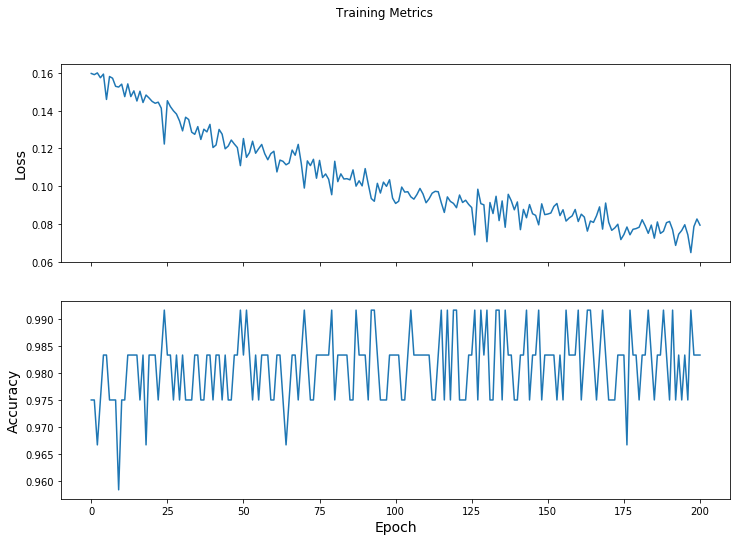

In [28]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

## Test

In [29]:
test_fp = '../data/iris_test.csv'

In [30]:
test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

In [31]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [32]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
